# QCD in Curve Space-Time
------

# Quantum Chromodynamics (QCD) in curved spacetime 
By using **SymPy** for symbolic computation. It defines the Lagrangian density for quarks and gluons, incorporating key components such as the metric determinant, gamma matrice $\gamma$s, covariant derivatives, and gluon field strength tensors. 

The main function, `euler_lagrange`, computes the equations of motion for a given field by:
1. Deriving partial derivatives of the Lagrangian with respect to the field and its derivatives.
2. Calculating the divergence of the derivative terms.
3. Ensuring matrix compatibility to handle potential shape mismatches during subtraction.

Finally, the script outputs the QCD Lagrangian and the resulting equations of motion for quarks and gluons.

In [ ]:
import sympy as sp

In [108]:
# Define spacetime coordinates
t, x, y, z = sp.symbols('t x y z')
coords = (t, x, y, z)

# Metric determinant and fields
g = sp.Function('g')(t, x, y, z)  # Metric determinant sqrt(-g)
psi = sp.Function('psi')(t, x, y, z)  # Quark field
A_mu = sp.Function('A_mu')(t, x, y, z)  # Gluon field

# Gamma matrices and other terms
gamma_mu = sp.MatrixSymbol('gamma', 4, 4)  # Gamma matrices
D_mu = sp.MatrixSymbol('D_mu', 4, 4)  # Covariant derivative
F_mu_nu = sp.MatrixSymbol('F_mu_nu', 4, 4)  # Gluon field strength tensor
mass = sp.symbols('m')
g_s = sp.symbols('g_s')  # Strong coupling constant

# Quark and gluon Lagrangians using trace for matrix terms
L_quark = sp.sqrt(-g) * sp.trace(sp.conjugate(psi) @ (sp.I * gamma_mu @ D_mu - mass * sp.eye(4)) @ psi)
L_gluon = -sp.sqrt(-g) * (1 / 4) * sp.trace(F_mu_nu.T @ F_mu_nu)

# Total Lagrangian
L_qcd = L_quark + L_gluon

# Functional approach to the Euler-Lagrange equation
def compute_dL_dfield(L, field):
    """Compute the partial derivative of the Lagrangian with respect to the field."""
    return sp.diff(L, field)

def compute_dL_dfield_deriv(L, field, coords):
    """Compute the partial derivative of the Lagrangian with respect to the field's derivative."""
    return sp.Matrix([sp.diff(L, sp.diff(field, coord)) for coord in coords])

def compute_divergence(dL_dfield_deriv, coords):
    """Compute the divergence of the derivative term."""
    return sp.Matrix([sp.diff(dL_dfield_deriv[i], coords[i]) for i in range(len(coords))])

def euler_lagrange(L, field, coords):
    """Compute the Euler-Lagrange equation for a given Lagrangian and field."""
    dL_dfield = compute_dL_dfield(L, field)
    dL_dfield_deriv = compute_dL_dfield_deriv(L, field, coords)
    divergence_term = compute_divergence(dL_dfield_deriv, coords)

    # Convert both terms to matrices of the same shape
    if isinstance(dL_dfield, sp.Matrix):
        dL_dfield = dL_dfield
    else:
        dL_dfield = sp.Matrix([dL_dfield])

    # Ensure divergence_term is also a matrix with compatible shape
    if isinstance(divergence_term, sp.Matrix):
        divergence_term = divergence_term
    else:
        divergence_term = sp.Matrix([divergence_term])

    # Ensure both matrices have the same number of rows and columns (e.g., (4, 1))
    if dL_dfield.shape != divergence_term.shape:
        # Make sure the scalar term is properly expanded to match the shape of the matrix
        divergence_term = sp.Matrix([divergence_term[i] for i in range(dL_dfield.shape[0])])

    return sp.simplify(dL_dfield - divergence_term)

# Derive equations of motion for quarks and gluons
EOM_quark = euler_lagrange(L_qcd, psi, coords)
EOM_gluon = euler_lagrange(L_qcd, A_mu, coords)

# Output results
def print_results():
    """Print the results of the Lagrangian and equations of motion."""
    print("QCD Lagrangian in Curved Spacetime:")
    sp.pprint(L_qcd)
    print("\nEquations of Motion for Quarks:")
    sp.pprint(EOM_quark)
    print("\nEquations of Motion for Gluons:")
    sp.pprint(EOM_gluon)

# Print the results
print_results()


QCD Lagrangian in Curved Spacetime:
  ________________                                    _____________          ________________   ⎛  ↪
╲╱ -g(t, x, y, z) ⋅(-4⋅m + ⅈ⋅tr(γ⋅Dₘᵤ))⋅ψ(t, x, y, z)⋅ψ(t, x, y, z) - 0.25⋅╲╱ -g(t, x, y, z) ⋅tr⎝F ↪

↪      T       ⎞
↪ ₘᵤ ₙᵤ ⋅Fₘᵤ ₙᵤ⎠

Equations of Motion for Quarks:
⎡  ________________                     ⎛                      ∂       ⎛_____________⎞   _________ ↪
⎢╲╱ -g(t, x, y, z) ⋅(4⋅m - ⅈ⋅tr(γ⋅Dₘᵤ))⋅⎜- ψ(t, x, y, z)⋅──────────────⎝ψ(t, x, y, z)⎠ - ψ(t, x, y ↪
⎣                                       ⎝                ∂ψ(t, x, y, z)                            ↪

↪ ____⎞⎤
↪ , z)⎟⎥
↪     ⎠⎦

Equations of Motion for Gluons:
[0]


In [86]:
# Define spacetime and metric
x, y, z, t = sp.symbols('x y z t')
coords = (t, x, y, z)
g = sp.Function('g')(t, x, y, z)  # Metric determinant sqrt(-g)

# Define fields
psi = sp.Function('psi')(t, x, y, z)  # Quark field
A_mu = sp.Function('A_mu')(t, x, y, z)  # Gluon field (now a vector field)

# Gamma matrices and other terms remain the same
gamma_mu = sp.MatrixSymbol('gamma', 4, 4)  # Gamma matrices
D_mu = sp.MatrixSymbol('D_mu', 4, 4)  # Covariant derivative (MatrixSymbol here)

# Gluon field strength tensor remains a MatrixSymbol
F_mu_nu = sp.MatrixSymbol('F_mu_nu', 4, 4)
G_mu_nu = sp.MatrixSymbol('G_mu_nu', 4, 4)

# Lagrangian components remain the same
mass = sp.symbols('m')
g_s = sp.symbols('g_s')  # Strong coupling constant

In [90]:
# Compute the Action: Integral of L_qcd over spacetime
# Assuming spacetime bounds: t ∈ [t0, t1], x, y, z ∈ [-∞, ∞]
t0, t1 = sp.symbols('t0 t1')
action = sp.integrate( sp.integrate( sp.integrate( sp.integrate(L_qcd, (t, t0, t1)), (x, -sp.oo, sp.oo) ), (y, -sp.oo, sp.oo) ), (z, -sp.oo, sp.oo) )

In [106]:
print("\nL_quark:\n")
L_quark


L_quark:



sqrt(-g(t, x, y, z))*(-4*m + I*Trace(gamma*D_mu))*psi(t, x, y, z)*conjugate(psi(t, x, y, z))

In [109]:
print("\nL_gluon:\n")
L_gluon


L_gluon:



-0.25*sqrt(-g(t, x, y, z))*Trace(F_mu_nu.T*F_mu_nu)

In [104]:
print("\nL_qcd:\n")
L_qcd


L_qcd:



sqrt(-g(t, x, y, z))*(-4*m + I*Trace(gamma*D_mu))*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) - 0.25*sqrt(-g(t, x, y, z))*Trace(F_mu_nu.T*F_mu_nu)

In [111]:
EoM = EOM_quark + EOM_gluon
print("\nEquation of Motion:\n")
EoM


Equation of Motion:



Matrix([[sqrt(-g(t, x, y, z))*(4*m - I*Trace(gamma*D_mu))*(-psi(t, x, y, z)*Derivative(conjugate(psi(t, x, y, z)), psi(t, x, y, z)) - conjugate(psi(t, x, y, z)))]])

In [91]:
print("\nAction of L_qcd:\n")
action


Action of L_qcd:



Integral(sqrt(-g(t, x, y, z))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(F_mu_nu.T*F_mu_nu)), (t, t0, t1), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))

In [92]:
# Framework for Path Integral (Symbolic Outline)
# Path integral formulation cannot be computed directly symbolically.
# It is presented as a framework below:
path_integral = sp.Function("PI")(
    sp.Function("Fields")(psi, A_mu),
    sp.Function("Exp")(-sp.I * action)
)

In [93]:
print("\nPath Integral (Symbolic Representation):")
path_integral


Path Integral (Symbolic Representation):


PI(Fields(psi(t, x, y, z), A_mu(t, x, y, z)), Exp(-I*Integral(sqrt(-g(t, x, y, z))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(F_mu_nu.T*F_mu_nu)), (t, t0, t1), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))))

In [95]:
# Convert equations to LaTeX
latex_L_quark = sp.latex(L_quark)
latex_L_gluon = sp.latex(L_gluon)
latex_L_qcd = sp.latex(L_qcd)
latex_EOM_quark = sp.latex(EOM_quark)
latex_EOM_gluon = sp.latex(EOM_gluon)
latex_EOM = sp.latex(EOM)
latex_action = sp.latex(action)
latex_path_integral = sp.latex(path_integral)

In [96]:
latex_L_quark

'\\sqrt{- g{\\left(t,x,y,z \\right)}} \\left(- 4 m + i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}}'

In [97]:
latex_L_gluon

'- 0.25 \\sqrt{- g{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(F_{\\mu \\nu}^{T} F_{\\mu \\nu} \\right)'

In [98]:
latex_L_qcd

'\\sqrt{- g{\\left(t,x,y,z \\right)}} \\left(- 4 m + i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} - 0.25 \\sqrt{- g{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(F_{\\mu \\nu}^{T} F_{\\mu \\nu} \\right)'

In [99]:
latex_EOM_quark

'\\left[\\begin{matrix}\\sqrt{- g{\\left(t,x,y,z \\right)}} \\left(4 m - i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\left(- \\psi{\\left(t,x,y,z \\right)} \\frac{\\partial}{\\partial \\psi{\\left(t,x,y,z \\right)}} \\overline{\\psi{\\left(t,x,y,z \\right)}} - \\overline{\\psi{\\left(t,x,y,z \\right)}}\\right)\\end{matrix}\\right]'

In [100]:
latex_EOM_gluon

'\\left[\\begin{matrix}0\\end{matrix}\\right]'

In [101]:
latex_EOM

'\\left[\\begin{matrix}\\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(4 m - i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\left(- \\psi{\\left(t,x,y,z \\right)} \\frac{\\partial}{\\partial \\psi{\\left(t,x,y,z \\right)}} \\overline{\\psi{\\left(t,x,y,z \\right)}} - \\overline{\\psi{\\left(t,x,y,z \\right)}}\\right)\\end{matrix}\\right]'

In [102]:
latex_action

'\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{t_{0}}^{t_{1}} \\sqrt{- g{\\left(t,x,y,z \\right)}} \\left(- 4.0 m \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} + 1.0 i \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right) - 0.25 \\operatorname{tr}\\left(F_{\\mu \\nu}^{T} F_{\\mu \\nu} \\right)\\right)\\, dt\\, dx\\, dy\\, dz'

In [103]:
latex_path_integral

'\\pi{\\left(\\operatorname{Fields}{\\left(\\psi{\\left(t,x,y,z \\right)},A_{\\mu}{\\left(t,x,y,z \\right)} \\right)},\\operatorname{Exp}{\\left(- i \\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{t_{0}}^{t_{1}} \\sqrt{- g{\\left(t,x,y,z \\right)}} \\left(- 4.0 m \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} + 1.0 i \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right) - 0.25 \\operatorname{tr}\\left(F_{\\mu \\nu}^{T} F_{\\mu \\nu} \\right)\\right)\\, dt\\, dx\\, dy\\, dz \\right)} \\right)}'

In [2]:
import sympy as sp

In [3]:
# Define spacetime and metric
x, y, z, t = sp.symbols('x y z t')
coords = (t, x, y, z)
g = sp.Function('g')(x, y, z, t)  # Metric determinant sqrt(-g)

# Define fields
psi = sp.Function('psi')(t, x, y, z)  # Quark field
A_mu = sp.Function('A_mu')(t, x, y, z)  # Gluon field (now a vector field)

# Gamma matrices and other terms remain the same
gamma_mu = sp.MatrixSymbol('gamma', 4, 4)  # Gamma matrices
D_mu = sp.MatrixSymbol('D_mu', 4, 4)  # Covariant derivative (MatrixSymbol here)

# Gluon field strength tensor remains a MatrixSymbol
G_mu_nu = sp.MatrixSymbol('G_mu_nu', 4, 4)

# Lagrangian components remain the same
mass = sp.symbols('m')
g_s = sp.symbols('g_s')  # Strong coupling constant

# Quark and gluon Lagrangians
L_quark = sp.sqrt(-g) * (sp.conjugate(psi) @ (sp.I * gamma_mu @ D_mu - mass * sp.eye(4)) @ psi)
L_gluon = -sp.sqrt(-g) * (1 / 4) * (G_mu_nu.T @ G_mu_nu)

# Total Lagrangian
L_qcd = L_quark + L_gluon

# Euler-Lagrange equations
def euler_lagrange(L, field):
    """Compute the Euler-Lagrange equation for a given Lagrangian and field."""
    dL_dfield = sp.diff(L, field)  # Partial derivative w.r.t. the field
    dL_dfield_deriv = sp.diff(L, sp.diff(field, t))  # Partial derivative w.r.t. the field's time derivative
    return sp.simplify(dL_dfield - sp.diff(dL_dfield_deriv, t))

# Derive equations of motion
EOM_quark = euler_lagrange(L_qcd, psi)
EOM_gluon = euler_lagrange(L_qcd, A_mu)

# Output results
print("=-=-=-=-=-=-=-=--=-=-=-=-=L_{QCD}=-=-=-=-=-=-=-=-=-=-=-=-=")
print("QCD Lagrangian in Curved Spacetime:")
sp.pprint(L_qcd)
print("\nEquations of Motion for Quarks:")
sp.pprint(EOM_quark)
print("\nEquations of Motion for Gluons:")
sp.pprint(EOM_gluon)


=-=-=-=-=-=-=-=--=-=-=-=-=L_{QCD}=-=-=-=-=-=-=-=-=-=-=-=-=
QCD Lagrangian in Curved Spacetime:
                                               ⎛          ⎡-m  0   0   0 ⎤⎞   
                                               ⎜          ⎢              ⎥⎟   
  ________________               _____________ ⎜          ⎢0   -m  0   0 ⎥⎟   
╲╱ -g(x, y, z, t) ⋅ψ(t, x, y, z)⋅ψ(t, x, y, z)⋅⎜ⅈ⋅γ⋅Dₘᵤ + ⎢              ⎥⎟ -0
                                               ⎜          ⎢0   0   -m  0 ⎥⎟   
                                               ⎜          ⎢              ⎥⎟   
                                               ⎝          ⎣0   0   0   -m⎦⎠   

                                     
                                     
      ________________       T       
.25⋅╲╱ -g(x, y, z, t) ⋅Gₘᵤ ₙᵤ ⋅Gₘᵤ ₙᵤ
                                     
                                     
                                     

Equations of Motion for Quarks:
                                                    

In [4]:
L_qcd

(-0.25*sqrt(-g(x, y, z, t)))*G_mu_nu.T*G_mu_nu + (sqrt(-g(x, y, z, t))*psi(t, x, y, z)*conjugate(psi(t, x, y, z)))*(Matrix([
[-m,  0,  0,  0],
[ 0, -m,  0,  0],
[ 0,  0, -m,  0],
[ 0,  0,  0, -m]]) + I*gamma*D_mu)

In [79]:
print("\nAction of L_qcd:\n")
action


Action of L_qcd:



Integral(sqrt(-g(t, x, y, z))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(G_mu_nu.T*G_mu_nu)), (t, t0, t1), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))

In [31]:
# Convert equations to LaTeX
latex_L_quark = sp.latex(L_quark)
latex_L_gluon = sp.latex(L_gluon)
latex_L_qcd = sp.latex(L_qcd)
latex_EOM_quark = sp.latex(EOM_quark)
latex_EOM_gluon = sp.latex(EOM_gluon)
latex_EOM = sp.latex(EOM)
latex_action = sp.latex(action)
latex_path_integral = sp.latex(path_integral)


In [32]:
latex_L_quark

'\\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(- 4 m + i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}}'

In [33]:
latex_L_gluon

'- 0.25 \\sqrt{- g{\\left(x,y,z,t \\right)}} \\operatorname{tr}\\left(G_{\\mu \\nu}^{T} G_{\\mu \\nu} \\right)'

In [34]:
latex_L_qcd

'\\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(- 4 m + i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} - 0.25 \\sqrt{- g{\\left(x,y,z,t \\right)}} \\operatorname{tr}\\left(G_{\\mu \\nu}^{T} G_{\\mu \\nu} \\right)'

### EoM

In [35]:
latex_EOM_quark

'\\left[\\begin{matrix}\\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(4 m - i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\left(- \\psi{\\left(t,x,y,z \\right)} \\frac{\\partial}{\\partial \\psi{\\left(t,x,y,z \\right)}} \\overline{\\psi{\\left(t,x,y,z \\right)}} - \\overline{\\psi{\\left(t,x,y,z \\right)}}\\right)\\end{matrix}\\right]'

In [36]:
latex_EOM_gluon

'\\left[\\begin{matrix}0\\end{matrix}\\right]'

In [37]:
latex_EOM

'\\left[\\begin{matrix}\\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(4 m - i \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right)\\right) \\left(- \\psi{\\left(t,x,y,z \\right)} \\frac{\\partial}{\\partial \\psi{\\left(t,x,y,z \\right)}} \\overline{\\psi{\\left(t,x,y,z \\right)}} - \\overline{\\psi{\\left(t,x,y,z \\right)}}\\right)\\end{matrix}\\right]'

In [38]:
latex_action

'\\int\\limits_{t_{0}}^{t_{1}}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty} \\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(- 4.0 m \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} + 1.0 i \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right) - 0.25 \\operatorname{tr}\\left(G_{\\mu \\nu}^{T} G_{\\mu \\nu} \\right)\\right)\\, dx\\, dy\\, dz\\, dt'

In [39]:
latex_path_integral

'\\pi{\\left(\\operatorname{Fields}{\\left(\\psi{\\left(t,x,y,z \\right)},A_{\\mu}{\\left(t,x,y,z \\right)} \\right)},\\operatorname{Exp}{\\left(- i \\int\\limits_{t_{0}}^{t_{1}}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty} \\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(- 4.0 m \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} + 1.0 i \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right) - 0.25 \\operatorname{tr}\\left(G_{\\mu \\nu}^{T} G_{\\mu \\nu} \\right)\\right)\\, dx\\, dy\\, dz\\, dt \\right)} \\right)}'

In [ ]:
action

Integral(sqrt(-g(x, y, z, t))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(G_mu_nu.T*G_mu_nu)), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo), (t, t0, t1))

In [ ]:
latex_action = sp.latex(action)

In [ ]:
latex_action

'\\int\\limits_{t_{0}}^{t_{1}}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty} \\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(- 4.0 m \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} + 1.0 i \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right) - 0.25 \\operatorname{tr}\\left(G_{\\mu \\nu}^{T} G_{\\mu \\nu} \\right)\\right)\\, dx\\, dy\\, dz\\, dt'

In [ ]:
latex_path_integral = sp.latex(path_integral)

In [ ]:
path_integral

PI(Fields(psi(t, x, y, z), A_mu(t, x, y, z)), Exp(-I*Integral(sqrt(-g(x, y, z, t))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(G_mu_nu.T*G_mu_nu)), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo), (t, t0, t1))))

In [ ]:
latex_path_integral

'\\pi{\\left(\\operatorname{Fields}{\\left(\\psi{\\left(t,x,y,z \\right)},A_{\\mu}{\\left(t,x,y,z \\right)} \\right)},\\operatorname{Exp}{\\left(- i \\int\\limits_{t_{0}}^{t_{1}}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty}\\int\\limits_{-\\infty}^{\\infty} \\sqrt{- g{\\left(x,y,z,t \\right)}} \\left(- 4.0 m \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} + 1.0 i \\psi{\\left(t,x,y,z \\right)} \\overline{\\psi{\\left(t,x,y,z \\right)}} \\operatorname{tr}\\left(\\gamma D_{\\mu} \\right) - 0.25 \\operatorname{tr}\\left(G_{\\mu \\nu}^{T} G_{\\mu \\nu} \\right)\\right)\\, dx\\, dy\\, dz\\, dt \\right)} \\right)}'

In [ ]:
L_gluon

-0.25*sqrt(-g(x, y, z, t))*Trace(G_mu_nu.T*G_mu_nu)

In [ ]:
L_qcd

sqrt(-g(x, y, z, t))*(-4*m + I*Trace(gamma*D_mu))*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) - 0.25*sqrt(-g(x, y, z, t))*Trace(G_mu_nu.T*G_mu_nu)

In [ ]:
action

Integral(sqrt(-g(x, y, z, t))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(G_mu_nu.T*G_mu_nu)), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo), (t, t0, t1))

In [ ]:
path_integral

PI(Fields(psi(t, x, y, z), A_mu(t, x, y, z)), Exp(-I*Integral(sqrt(-g(x, y, z, t))*(-4.0*m*psi(t, x, y, z)*conjugate(psi(t, x, y, z)) + 1.0*I*psi(t, x, y, z)*conjugate(psi(t, x, y, z))*Trace(gamma*D_mu) - 0.25*Trace(G_mu_nu.T*G_mu_nu)), (x, -oo, oo), (y, -oo, oo), (z, -oo, oo), (t, t0, t1))))

In [3]:
# Define spacetime and metric
x, y, z, t = sp.symbols('x y z t')
coords = (t, x, y, z)
g = sp.Function('g')(x, y, z, t)  # Metric determinant sqrt(-g)

# Define fields
psi = sp.Function('psi')(t, x, y, z)  # Quark field
A_mu = sp.Function('A_mu')(t, x, y, z)  # Gluon field (now a vector field)

# Gamma matrices and other terms remain the same
gamma_mu = sp.MatrixSymbol('gamma', 4, 4)  # Gamma matrices
D_mu = sp.MatrixSymbol('D_mu', 4, 4)  # Covariant derivative (MatrixSymbol here)

# Gluon field strength tensor remains a MatrixSymbol
F_mu_nu = sp.MatrixSymbol('F_mu_nu', 4, 4)

# Lagrangian components remain the same
mass = sp.symbols('m')
g_s = sp.symbols('g_s')  # Strong coupling constant

# Quark and gluon Lagrangians
L_quark = sp.sqrt(-g) * (sp.conjugate(psi) @ (sp.I * gamma_mu @ D_mu - mass * sp.eye(4)) @ psi)
L_gluon = -sp.sqrt(-g) * (1 / 4) * (F_mu_nu.T @ F_mu_nu)

# Total Lagrangian
L_qcd = L_quark + L_gluon

# Euler-Lagrange equations
def euler_lagrange(L, field):
    """Compute the Euler-Lagrange equation for a given Lagrangian and field."""
    dL_dfield = sp.diff(L, field)  # Partial derivative w.r.t. the field
    dL_dfield_deriv = sp.diff(L, sp.diff(field, t))  # Partial derivative w.r.t. the field's time derivative
    return sp.simplify(dL_dfield - sp.diff(dL_dfield_deriv, t))

# Derive equations of motion
EOM_quark = euler_lagrange(L_qcd, psi)
EOM_gluon = euler_lagrange(L_qcd, A_mu)



# Output results
print("QCD Lagrangian in Curved Spacetime:")
sp.pprint(L_qcd)
print("\nEquations of Motion for Quarks:")
sp.pprint(EOM_quark)
print("\nEquations of Motion for Gluons:")
sp.pprint(EOM_gluon)


QCD Lagrangian in Curved Spacetime:
                                               ⎛          ⎡-m  0   0   0 ⎤⎞                        ↪
                                               ⎜          ⎢              ⎥⎟                        ↪
  ________________               _____________ ⎜          ⎢0   -m  0   0 ⎥⎟         ______________ ↪
╲╱ -g(x, y, z, t) ⋅ψ(t, x, y, z)⋅ψ(t, x, y, z)⋅⎜ⅈ⋅γ⋅Dₘᵤ + ⎢              ⎥⎟ -0.25⋅╲╱ -g(x, y, z, t ↪
                                               ⎜          ⎢0   0   -m  0 ⎥⎟                        ↪
                                               ⎜          ⎢              ⎥⎟                        ↪
                                               ⎝          ⎣0   0   0   -m⎦⎠                        ↪

↪                  
↪                  
↪ __       T       
↪ ) ⋅Fₘᵤ ₙᵤ ⋅Fₘᵤ ₙᵤ
↪                  
↪                  
↪                  

Equations of Motion for Quarks:
                                                                                 ⎛ 

In [4]:
L_qcd

(-0.25*sqrt(-g(x, y, z, t)))*F_mu_nu.T*F_mu_nu + (sqrt(-g(x, y, z, t))*psi(t, x, y, z)*conjugate(psi(t, x, y, z)))*(Matrix([
[-m,  0,  0,  0],
[ 0, -m,  0,  0],
[ 0,  0, -m,  0],
[ 0,  0,  0, -m]]) + I*gamma*D_mu)

In [5]:
EOM_quark

(sqrt(-g(x, y, z, t))*(psi(t, x, y, z)*Derivative(conjugate(psi(t, x, y, z)), psi(t, x, y, z)) + conjugate(psi(t, x, y, z))))*(Matrix([
[-m,  0,  0,  0],
[ 0, -m,  0,  0],
[ 0,  0, -m,  0],
[ 0,  0,  0, -m]]) + I*gamma*D_mu)

In [1]:
import sympy as sp

# Define spacetime coordinates
t, x, y, z = sp.symbols('t x y z')
coords = (t, x, y, z)

# Metric determinant and fields
g = sp.Function('g')(x, y, z, t)  # Metric determinant sqrt(-g)
psi = sp.Matrix(sp.symbols('psi_1 psi_2 psi_3 psi_4')).reshape(4, 1)  # Quark field (4x1 spinor)
A_mu = sp.Matrix([sp.Function(f"A_{i}")(t, x, y, z) for i in ['t', 'x', 'y', 'z']])  # Gluon field components (4x1 vector)

# Gamma matrices and other terms
gamma_mu = sp.MatrixSymbol('gamma', 4, 4)  # Gamma matrices (4x4 matrix)
mass = sp.symbols('m')  # Quark mass
g_s = sp.symbols('g_s')  # Strong coupling constant

# Covariant derivative D_mu (adjust dimensions for compatibility)
partial_mu = sp.Matrix([sp.Function(f"partial_{i}")(t, x, y, z) for i in ['t', 'x', 'y', 'z']]).reshape(4, 1)
D_mu = sp.diag(*partial_mu) - sp.I * g_s * sp.diag(*A_mu)  # 4x4 diagonal matrix for simplicity

# Quark Lagrangian: psi_dagger (i * gamma_mu * D_mu - m) psi
psi_dagger = psi.T  # Hermitian conjugate of psi
#gamma_mu_matrix = sp.Matrix(sp.symbols('gamma_00:4 gamma_10:4 gamma_20:4 gamma_30:4')).reshape(4, 4)  # 4x4 matrix
gamma_mu_matrix = sp.Matrix(sp.symbols('gamma_0:4_0:4')).reshape(4, 4)
quark_term = sp.I * gamma_mu_matrix @ D_mu - mass * sp.eye(4)  # 4x4 matrix
L_quark = sp.sqrt(-g) * (psi_dagger @ quark_term @ psi)[0]  # Extract scalar result

# Gluon field strength tensor G_mu_nu = ∂_mu A_nu - ∂_nu A_mu + g_s [A_mu, A_nu]
G_mu_nu = sp.Matrix([
    [partial_mu[i] * A_mu[j] - partial_mu[j] * A_mu[i] + g_s * (A_mu[i] * A_mu[j] - A_mu[j] * A_mu[i])
     for j in range(4)]
    for i in range(4)
])

# Gluon Lagrangian: -1/4 G_mu_nu^2
L_gluon = -sp.sqrt(-g) * (1 / 4) * sp.trace(G_mu_nu.T @ G_mu_nu)

# Total Lagrangian
L_qcd = L_quark + L_gluon

print("Quark Lagrangian:")
sp.pprint(L_quark)

print("\nGluon Lagrangian:")
sp.pprint(L_gluon)


Quark Lagrangian:
  ________________                                                                                 ↪
╲╱ -g(x, y, z, t) ⋅(ψ₁⋅(ⅈ⋅γ₁ ₀⋅ψ₂⋅(-ⅈ⋅gₛ⋅Aₜ(t, x, y, z) + partialₜ(t, x, y, z)) + ⅈ⋅γ₂ ₀⋅ψ₃⋅(-ⅈ⋅gₛ ↪

↪                                                                                                  ↪
↪ ⋅Aₜ(t, x, y, z) + partialₜ(t, x, y, z)) + ⅈ⋅γ₃ ₀⋅ψ₄⋅(-ⅈ⋅gₛ⋅Aₜ(t, x, y, z) + partialₜ(t, x, y, z) ↪

↪                                                                                                  ↪
↪ ) + ψ₁⋅(ⅈ⋅γ₀ ₀⋅(-ⅈ⋅gₛ⋅Aₜ(t, x, y, z) + partialₜ(t, x, y, z)) - m)) + ψ₂⋅(ⅈ⋅γ₀ ₁⋅ψ₁⋅(-ⅈ⋅gₛ⋅Aₓ(t,  ↪

↪                                                                                                  ↪
↪ x, y, z) + partialₓ(t, x, y, z)) + ⅈ⋅γ₂ ₁⋅ψ₃⋅(-ⅈ⋅gₛ⋅Aₓ(t, x, y, z) + partialₓ(t, x, y, z)) + ⅈ⋅γ ↪

↪                                                                                                  ↪
↪ ₃ ₁⋅ψ₄⋅(-ⅈ⋅gₛ⋅Aₓ(t, x, y, z) + partialₓ(t, x, y, z)) + ψ₂⋅(ⅈ⋅γ₁ ₁⋅(

In [2]:
L_qcd

sqrt(-g(x, y, z, t))*(psi_1*(I*gamma_1_0*psi_2*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) + I*gamma_2_0*psi_3*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) + I*gamma_3_0*psi_4*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) + psi_1*(I*gamma_0_0*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) - m)) + psi_2*(I*gamma_0_1*psi_1*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) + I*gamma_2_1*psi_3*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) + I*gamma_3_1*psi_4*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) + psi_2*(I*gamma_1_1*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) - m)) + psi_3*(I*gamma_0_2*psi_1*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) + I*gamma_1_2*psi_2*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) + I*gamma_3_2*psi_4*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) + psi_3*(I*gamma_2_2*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) - m)) + psi_4*(I*gamma_0_3*psi_1*(-I*g_s*A_z(t, x, y, z) + partial_z(t, x, y, z)) + I*gamma_1_3*psi_2*(-I*g_s*A_z(t,

In [ ]:
# Euler-Lagrange equations
def euler_lagrange(L, field, coords):
    """
    Compute the Euler-Lagrange equation for a given Lagrangian and field.

    Parameters:
    - L: The Lagrangian
    - field: The field (e.g., psi or A_mu)
    - coords: The spacetime coordinates (e.g., t, x, y, z)

    Returns:
    - The Euler-Lagrange equation as a simplified expression
    """
    # Partial derivative of L with respect to the field
    dL_dfield = sp.diff(L, field)

    # Partial derivative of L with respect to the derivatives of the field
    dL_dfield_deriv = sp.Matrix([sp.diff(L, sp.diff(field, coord)) for coord in coords])

    # Divergence of dL_dfield_deriv
    divergence_term = sp.Matrix([sp.diff(dL_dfield_deriv[i], coords[i]) for i in range(len(coords))])

    # Combine terms to form the Euler-Lagrange equation
    eom = sp.simplify(dL_dfield - divergence_term)

    return eom

# Derive equations of motion for quarks and gluons
EOM_quark = euler_lagrange(L_qcd, psi, coords)
EOM_gluon = euler_lagrange(L_qcd, A_mu, coords)

# Output results
print("QCD Lagrangian in Curved Spacetime:")
sp.pprint(L_qcd)
print("\nEquations of Motion for Quarks:")
sp.pprint(EOM_quark)
print("\nEquations of Motion for Gluons:")
sp.pprint(EOM_gluon)


In [ ]:
L_qcd

sqrt(-g(x, y, z, t))*(psi_1*(I*gamma_1_0*psi_2*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) + I*gamma_2_0*psi_3*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) + I*gamma_3_0*psi_4*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) + psi_1*(I*gamma_0_0*(-I*g_s*A_t(t, x, y, z) + partial_t(t, x, y, z)) - m)) + psi_2*(I*gamma_0_1*psi_1*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) + I*gamma_2_1*psi_3*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) + I*gamma_3_1*psi_4*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) + psi_2*(I*gamma_1_1*(-I*g_s*A_x(t, x, y, z) + partial_x(t, x, y, z)) - m)) + psi_3*(I*gamma_0_2*psi_1*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) + I*gamma_1_2*psi_2*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) + I*gamma_3_2*psi_4*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) + psi_3*(I*gamma_2_2*(-I*g_s*A_y(t, x, y, z) + partial_y(t, x, y, z)) - m)) + psi_4*(I*gamma_0_3*psi_1*(-I*g_s*A_z(t, x, y, z) + partial_z(t, x, y, z)) + I*gamma_1_3*psi_2*(-I*g_s*A_z(t,

In [ ]:
L_gluon

-0.25*sqrt(-g(x, y, z, t))*((-A_t(t, x, y, z)*partial_x(t, x, y, z) + A_x(t, x, y, z)*partial_t(t, x, y, z))**2 + (A_t(t, x, y, z)*partial_x(t, x, y, z) - A_x(t, x, y, z)*partial_t(t, x, y, z))**2 + (-A_t(t, x, y, z)*partial_y(t, x, y, z) + A_y(t, x, y, z)*partial_t(t, x, y, z))**2 + (A_t(t, x, y, z)*partial_y(t, x, y, z) - A_y(t, x, y, z)*partial_t(t, x, y, z))**2 + (-A_t(t, x, y, z)*partial_z(t, x, y, z) + A_z(t, x, y, z)*partial_t(t, x, y, z))**2 + (A_t(t, x, y, z)*partial_z(t, x, y, z) - A_z(t, x, y, z)*partial_t(t, x, y, z))**2 + (-A_x(t, x, y, z)*partial_y(t, x, y, z) + A_y(t, x, y, z)*partial_x(t, x, y, z))**2 + (A_x(t, x, y, z)*partial_y(t, x, y, z) - A_y(t, x, y, z)*partial_x(t, x, y, z))**2 + (-A_x(t, x, y, z)*partial_z(t, x, y, z) + A_z(t, x, y, z)*partial_x(t, x, y, z))**2 + (A_x(t, x, y, z)*partial_z(t, x, y, z) - A_z(t, x, y, z)*partial_x(t, x, y, z))**2 + (-A_y(t, x, y, z)*partial_z(t, x, y, z) + A_z(t, x, y, z)*partial_y(t, x, y, z))**2 + (A_y(t, x, y, z)*partial_z(t, x

Covariant Derivative Component 0: A0(t, x, y, z)*Derivative(g(t, x, y, z), t)/(2*g(t, x, y, z)) + A0(t, x, y, z)*Derivative(g(t, x, y, z), x)/(2*g(t, x, y, z)) + A0(t, x, y, z)*Derivative(g(t, x, y, z), y)/(2*g(t, x, y, z)) + A0(t, x, y, z)*Derivative(g(t, x, y, z), z)/(2*g(t, x, y, z)) - A1(t, x, y, z)*Derivative(g(t, x, y, z), t)/(2*g(t, x, y, z)) + A1(t, x, y, z)*Derivative(g(t, x, y, z), x)/(2*g(t, x, y, z)) - A2(t, x, y, z)*Derivative(g(t, x, y, z), t)/(2*g(t, x, y, z)) + A2(t, x, y, z)*Derivative(g(t, x, y, z), y)/(2*g(t, x, y, z)) - A3(t, x, y, z)*Derivative(g(t, x, y, z), t)/(2*g(t, x, y, z)) + A3(t, x, y, z)*Derivative(g(t, x, y, z), z)/(2*g(t, x, y, z)) + Derivative(A0(t, x, y, z), t)
Covariant Derivative Component 1: A0(t, x, y, z)*Derivative(g(t, x, y, z), t)/(2*g(t, x, y, z)) - A0(t, x, y, z)*Derivative(g(t, x, y, z), x)/(2*g(t, x, y, z)) + A1(t, x, y, z)*Derivative(g(t, x, y, z), t)/(2*g(t, x, y, z)) + A1(t, x, y, z)*Derivative(g(t, x, y, z), x)/(2*g(t, x, y, z)) + A1(t, 

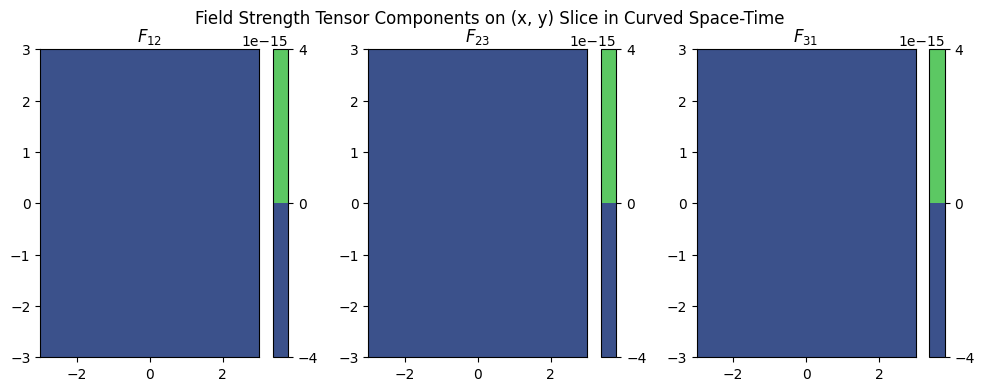

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the coordinates and metric tensor for a 4-dimensional curved space-time
coords = sp.symbols('t x y z')
t, x, y, z = coords
g = sp.Function('g')(t, x, y, z)

# Define the metric tensor (for simplicity, we'll use a symbolic representation)
metric = sp.Matrix([
    [g, 0, 0, 0],
    [0, g, 0, 0],
    [0, 0, g, 0],
    [0, 0, 0, g]
])

# Define the inverse metric tensor
inv_metric = metric.inv()

# Define the Christoffel symbols
def christoffel_symbols(g, coords):
    gamma = {}
    for k in range(4):
        for i in range(4):
            for j in range(4):
                gamma[(k, i, j)] = sp.Rational(1, 2) * sum([inv_metric[k, l] * (sp.diff(g[i, l], coords[j]) + sp.diff(g[j, l], coords[i]) - sp.diff(g[i, j], coords[l])) for l in range(4)])
    return gamma

# Calculate the Christoffel symbols
gamma = christoffel_symbols(metric, coords)

# Define the covariant derivative (acting on a vector field A)
def covariant_derivative(A, gamma, coords):
    nabla_A = sp.zeros(4, 1)
    for mu in range(4):
        nabla_A[mu] = sp.diff(A[mu], coords[mu]) + sum([gamma[(mu, i, j)] * A[j] for i in range(4) for j in range(4)])
    return nabla_A

# Example: Define a gauge field A (for simplicity, use symbolic components)
A = sp.Matrix([sp.Function('A{}'.format(i))(t, x, y, z) for i in range(4)])

# Calculate the covariant derivative of A
nabla_A = covariant_derivative(A, gamma, coords)

# Print the covariant derivative components
for i in range(4):
    print(f"Covariant Derivative Component {i}: {nabla_A[i]}")

# Define the field strength tensor F_{\mu\nu}^a in curved space-time
def field_strength_tensor(A, gamma, coords):
    F = sp.zeros(4, 4)
    for mu in range(4):
        for nu in range(4):
            F[mu, nu] = sp.diff(A[nu], coords[mu]) - sp.diff(A[mu], coords[nu]) + sum([gamma[(mu, i, j)] * A[j] for i in range(4) for j in range(4)])
    return F

# Calculate the field strength tensor for A
F = field_strength_tensor(A, gamma, coords)

# Print the field strength tensor components
for i in range(4):
    for j in range(4):
        print(f"Field Strength Tensor Component F[{i},{j}]: {F[i,j]}")

# Visualize F[1,2] on the (x, y)-slice
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.contourf(x_vals, y_vals, F_val[1, 2], levels=50, cmap='viridis')
plt.colorbar()
plt.title('$F_{12}$')

plt.subplot(132)
plt.contourf(x_vals, y_vals, F_val[2, 3], levels=50, cmap='viridis')
plt.colorbar()
plt.title('$F_{23}$')

plt.subplot(133)
plt.contourf(x_vals, y_vals, F_val[3, 1], levels=50, cmap='viridis')
plt.colorbar()
plt.title('$F_{31}$')

plt.suptitle('Field Strength Tensor Components on (x, y) Slice in Curved Space-Time')
plt.show()



In [ ]:
#F

In [ ]:
import sympy as sp

# Symbols and Indices
x, y, z, t = sp.symbols("x y z t")  # Spacetime coordinates
#mu, nu, rho, sigma = sp.symbols("mu nu rho sigma", integer=True)  # Spacetime indices
#a, b = sp.symbols("a b", integer=True)  # Gauge group indices

mu, nu, rho, sigma = sp.symbols("mu nu rho sigma", integer=True)  # Spacetime indices
a, b, c = sp.symbols("a b c", integer=True)  # Gauge group indices


# Metric and its inverse
g = sp.Function("g")(mu, nu)  # Metric tensor
g_inv = sp.Function("g_inv")(mu, nu)  # Metric inverse

# Gauge field strength tensor
A = sp.symbols("A_mu_a", cls=sp.Function)  # Gauge potential A(mu, a)  # Gauge potential
F = sp.Function("F")(mu, nu, a)  # Field strength tensor
D_mu = sp.Function("D_mu")(a)  # Covariant derivative operator

# Levi-Civita connection (Christoffel symbols)
#Gamma = sp.Function("Gamma")(mu, nu, rho)



# Christoffel symbols
Gamma = sp.symbols("Gamma", cls=sp.Function)  # Christoffel symbol as a tensor

# Spinor field
#spinor = sp.Function("psi")(x, y, z, t)  # Spinor field



# Define field strength tensor in curved space
F_mu_nu = sp.simplify(sp.diff(A(mu, a), nu) - sp.diff(A(nu, a), mu) + sp.Sum(sp.Function("f")(a, b, c) * A(mu, b) * A(nu, c), (b, 0, 3), (c, 0, 3)))

# Covariant derivative for a spinor field
spinor = sp.Function("psi")(x, y, z, t)  # Spinor field
D_spinor = sp.simplify(sp.diff(spinor, mu) + sp.Sum(Gamma(mu, nu, rho) * spinor, (nu, 0, 3)))

# Dirac operator in curved spacetime
gamma_mu = sp.Function("gamma_mu")(mu)  # Curved spacetime gamma matrices
Dirac_operator = sp.simplify(sp.Sum(gamma_mu * D_spinor, (mu, 0, 3)))



# Print the results

# Print the results

print("Field strength tensor F_mu_nu in curved space:")
sp.pprint(F_mu_nu, use_unicode=True)

print("\nCovariant derivative of the spinor field:")
sp.pprint(D_spinor, use_unicode=True)

print("\nDirac operator in curved spacetime:")
sp.pprint(Dirac_operator, use_unicode=True)


Field strength tensor F_mu_nu in curved space:
  3     3                                     
 ___   ___                                    
 ╲     ╲                                      
  ╲     ╲                                     
  ╱     ╱   Aₘᵤ ₐ(μ, b)⋅Aₘᵤ ₐ(ν, c)⋅f(a, b, c)
 ╱     ╱                                      
 ‾‾‾   ‾‾‾                                    
c = 0 b = 0                                   
Field strength tensor F_mu_nu in curved space:
  3     3                                     
 ___   ___                                    
 ╲     ╲                                      
  ╲     ╲                                     
  ╱     ╱   Aₘᵤ ₐ(μ, b)⋅Aₘᵤ ₐ(ν, c)⋅f(a, b, c)
 ╱     ╱                                      
 ‾‾‾   ‾‾‾                                    
c = 0 b = 0                                   

Covariant derivative of the spinor field:
                3             
               ___            
               ╲              
                ╲ 

In [ ]:
F_mu_nu

Sum(A_mu_a(mu, b)*A_mu_a(nu, c)*f(a, b, c), (b, 0, 3), (c, 0, 3))

In [ ]:
D_spinor

psi(x, y, z, t)*Sum(Gamma(mu, nu, rho), (nu, 0, 3))

In [ ]:
Dirac_operator

psi(x, y, z, t)*Sum((Gamma(mu, 0, rho) + Gamma(mu, 1, rho) + Gamma(mu, 2, rho) + Gamma(mu, 3, rho))*gamma_mu(mu), (mu, 0, 3))

In [ ]:
# Define spacetime and metric
x, y, z, t = sp.symbols('x y z t')
coords = (t, x, y, z)
g = sp.Function('g')(x, y, z, t)  # Metric determinant sqrt(-g)

# Define fields
psi = sp.Function('psi')(t, x, y, z)  # Quark field
A_mu = sp.Function('A_mu')(t, x, y, z)  # Gluon field (now a vector field)

# Gamma matrices and other terms remain the same
gamma_mu = sp.MatrixSymbol('gamma', 4, 4)  # Gamma matrices
D_mu = sp.MatrixSymbol('D_mu', 4, 4)  # Covariant derivative (MatrixSymbol here)

# Gluon field strength tensor remains a MatrixSymbol
G_mu_nu = sp.MatrixSymbol('G_mu_nu', 4, 4)

# Lagrangian components remain the same
mass = sp.symbols('m')
g_s = sp.symbols('g_s')  # Strong coupling constant

# Quark and gluon Lagrangians
L_quark = sp.sqrt(-g) * (sp.conjugate(psi) @ (sp.I * gamma_mu @ D_mu - mass * sp.eye(4)) @ psi)
L_gluon = -sp.sqrt(-g) * (1 / 4) * (G_mu_nu.T @ G_mu_nu)

# Total Lagrangian
L_qcd = L_quark + L_gluon

# Euler-Lagrange equations
def euler_lagrange(L, field):
    """Compute the Euler-Lagrange equation for a given Lagrangian and field."""
    dL_dfield = sp.diff(L, field)  # Partial derivative w.r.t. the field
    dL_dfield_deriv = sp.diff(L, sp.diff(field, t))  # Partial derivative w.r.t. the field's time derivative
    return sp.simplify(dL_dfield - sp.diff(dL_dfield_deriv, t))

# Derive equations of motion
EOM_quark = euler_lagrange(L_qcd, psi)
EOM_gluon = euler_lagrange(L_qcd, A_mu)

# Output results
print("QCD Lagrangian in Curved Spacetime:")
sp.pprint(L_qcd)
print("\nEquations of Motion for Quarks:")
sp.pprint(EOM_quark)
print("\nEquations of Motion for Gluons:")
sp.pprint(EOM_gluon)


QCD Lagrangian in Curved Spacetime:
                                               ⎛          ⎡-m  0   0   0 ⎤⎞                        ↪
                                               ⎜          ⎢              ⎥⎟                        ↪
  ________________               _____________ ⎜          ⎢0   -m  0   0 ⎥⎟         ______________ ↪
╲╱ -g(x, y, z, t) ⋅ψ(t, x, y, z)⋅ψ(t, x, y, z)⋅⎜ⅈ⋅γ⋅Dₘᵤ + ⎢              ⎥⎟ -0.25⋅╲╱ -g(x, y, z, t ↪
                                               ⎜          ⎢0   0   -m  0 ⎥⎟                        ↪
                                               ⎜          ⎢              ⎥⎟                        ↪
                                               ⎝          ⎣0   0   0   -m⎦⎠                        ↪

↪                  
↪                  
↪ __       T       
↪ ) ⋅Gₘᵤ ₙᵤ ⋅Gₘᵤ ₙᵤ
↪                  
↪                  
↪                  

Equations of Motion for Quarks:
                                                                                 ⎛ 

In [ ]:
EOM_quark

(sqrt(-g(x, y, z, t))*(psi(t, x, y, z)*Derivative(conjugate(psi(t, x, y, z)), psi(t, x, y, z)) + conjugate(psi(t, x, y, z))))*(Matrix([
[-m,  0,  0,  0],
[ 0, -m,  0,  0],
[ 0,  0, -m,  0],
[ 0,  0,  0, -m]]) + I*gamma*D_mu)